In [ ]:
import pandas as pd
from mov_class_metrics import accuracy, precision, recall

In [ ]:

# Load dataframes and collect results for all classes
classes = ['car', 'bus', 'truck', 'trailer']
all_results = {}
for class_name in classes:
    path = '/workspaces/Poly-MOT/jittering_module/results/' + class_name + '_mov_classification.csv'
    df = pd.read_csv(path)
    results = {}
    results['accuracy'] = accuracy(df)
    results['precision'] = precision(df)
    results['recall'] = recall(df)
    results['no of predictions'] = df['mov_Pred'].notnull().sum()
    results['no of matches'] = len(df)
    all_results[class_name.capitalize()] = results

results_df = pd.DataFrame(all_results).transpose()

display(results_df)


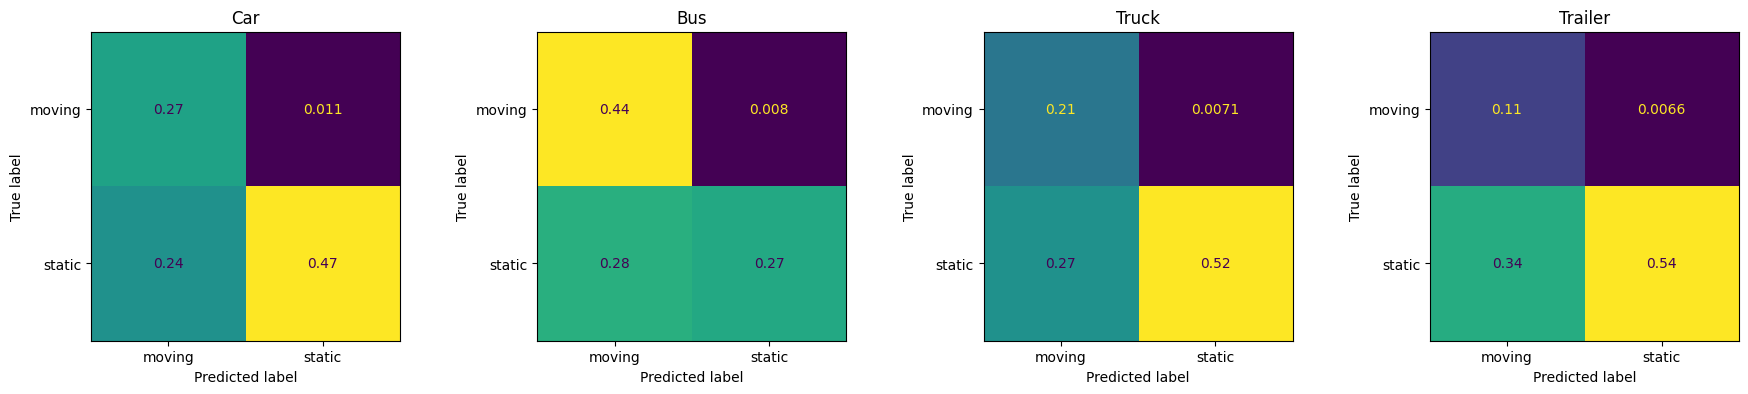

In [7]:
### Confusion Matrix
import sklearn.metrics as sk
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(classes), figsize=(18, 4))

for idx, class_name in enumerate(classes):
    path = '/workspaces/Poly-MOT/jittering_module/results/' + class_name + '_mov_classification.csv'
    df = pd.read_csv(path)
    mask = df['mov_Pred'].notnull() & df['mov_GT'].notnull()
    prediction_arr = df['mov_Pred'][mask].to_numpy()
    GT_arr = df['mov_GT'][mask].to_numpy()
    sk.ConfusionMatrixDisplay.from_predictions(GT_arr, prediction_arr, ax=axes[idx], colorbar=False, normalize='all')
    axes[idx].set_title(class_name.capitalize())



plt.tight_layout()
plt.show()

## Calculate Precision Recall Curve


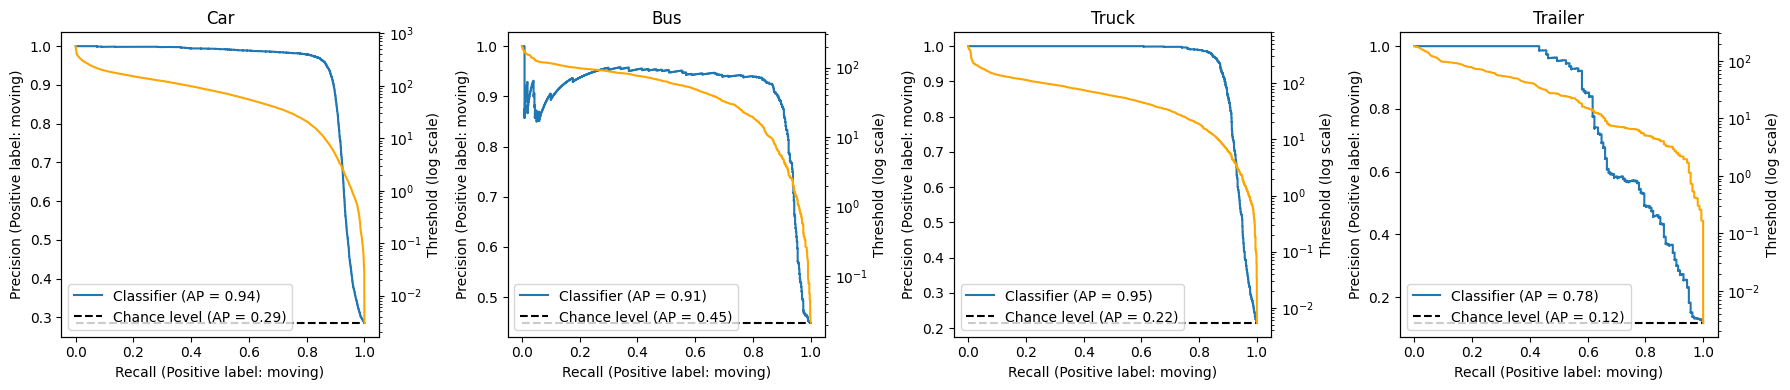

In [38]:
import sklearn.metrics as sk
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(classes), figsize=(18, 4))
all_thresholds = {}
for idx, class_name in enumerate(classes):
    path = '/workspaces/Poly-MOT/jittering_module/results/z_scores/' + class_name + '_z_scores.csv'
    df = pd.read_csv(path)
    mask = df['mov_Pred'].notnull() & df['mov_GT'].notnull()
    prediction_arr = df['mov_Pred'][mask].to_numpy()
    GT_arr = df['mov_GT'][mask].to_numpy()
    prec, rec, threshold = sk.precision_recall_curve(GT_arr, prediction_arr, pos_label='moving')
    all_thresholds[class_name] = threshold
    sk.PrecisionRecallDisplay.from_predictions(GT_arr, prediction_arr, pos_label='moving', ax=axes[idx], plot_chance_level=True)
    
    # axes[idx].plot(rec, prec, label='Classifier')
    ax2 = axes[idx].twinx()
    ax2.plot(rec[1:], threshold, color='orange', label='Threshold')
    ax2.set_yscale('log')
    ax2.set_ylabel('Threshold (log scale)')
    axes[idx].set_title(class_name.capitalize())
    
    



plt.tight_layout()
plt.show()


In [27]:
legend
